In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("wine_data.csv")

In [ ]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
data_drop = data.dropna() #데이터 전처리 (결측치 제거)

In [ ]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
for x in data.iloc:
    print(x)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
free sulfur dioxide      6.00000
total sulfur dioxide     9.00000
density                  0.99628
pH                       3.10000
sulphates                0.48000
alcohol                 10.40000
quality                  6.00000
Name: 1214, dtype: float64
fixed acidity            8.80000
volatile acidity         0.27000
citric acid              0.46000
residual sugar           2.10000
chlorides                0.09500
free sulfur dioxide     20.00000
total sulfur dioxide    29.00000
density                  0.99488
pH                       3.26000
sulphates                0.56000
alcohol                 11.30000
quality                  6.00000
Name: 1215, dtype: float64
fixed acidity            7.90000
volatile acidity         0.57000
citric acid              0.31000
residual sugar           2.00000
chlorides                0.07900
free sulfur dioxide     10.00000
total sulfur dioxide    79.00000
density                  0.99677
pH                 

<Figure size 640x480 with 0 Axes>

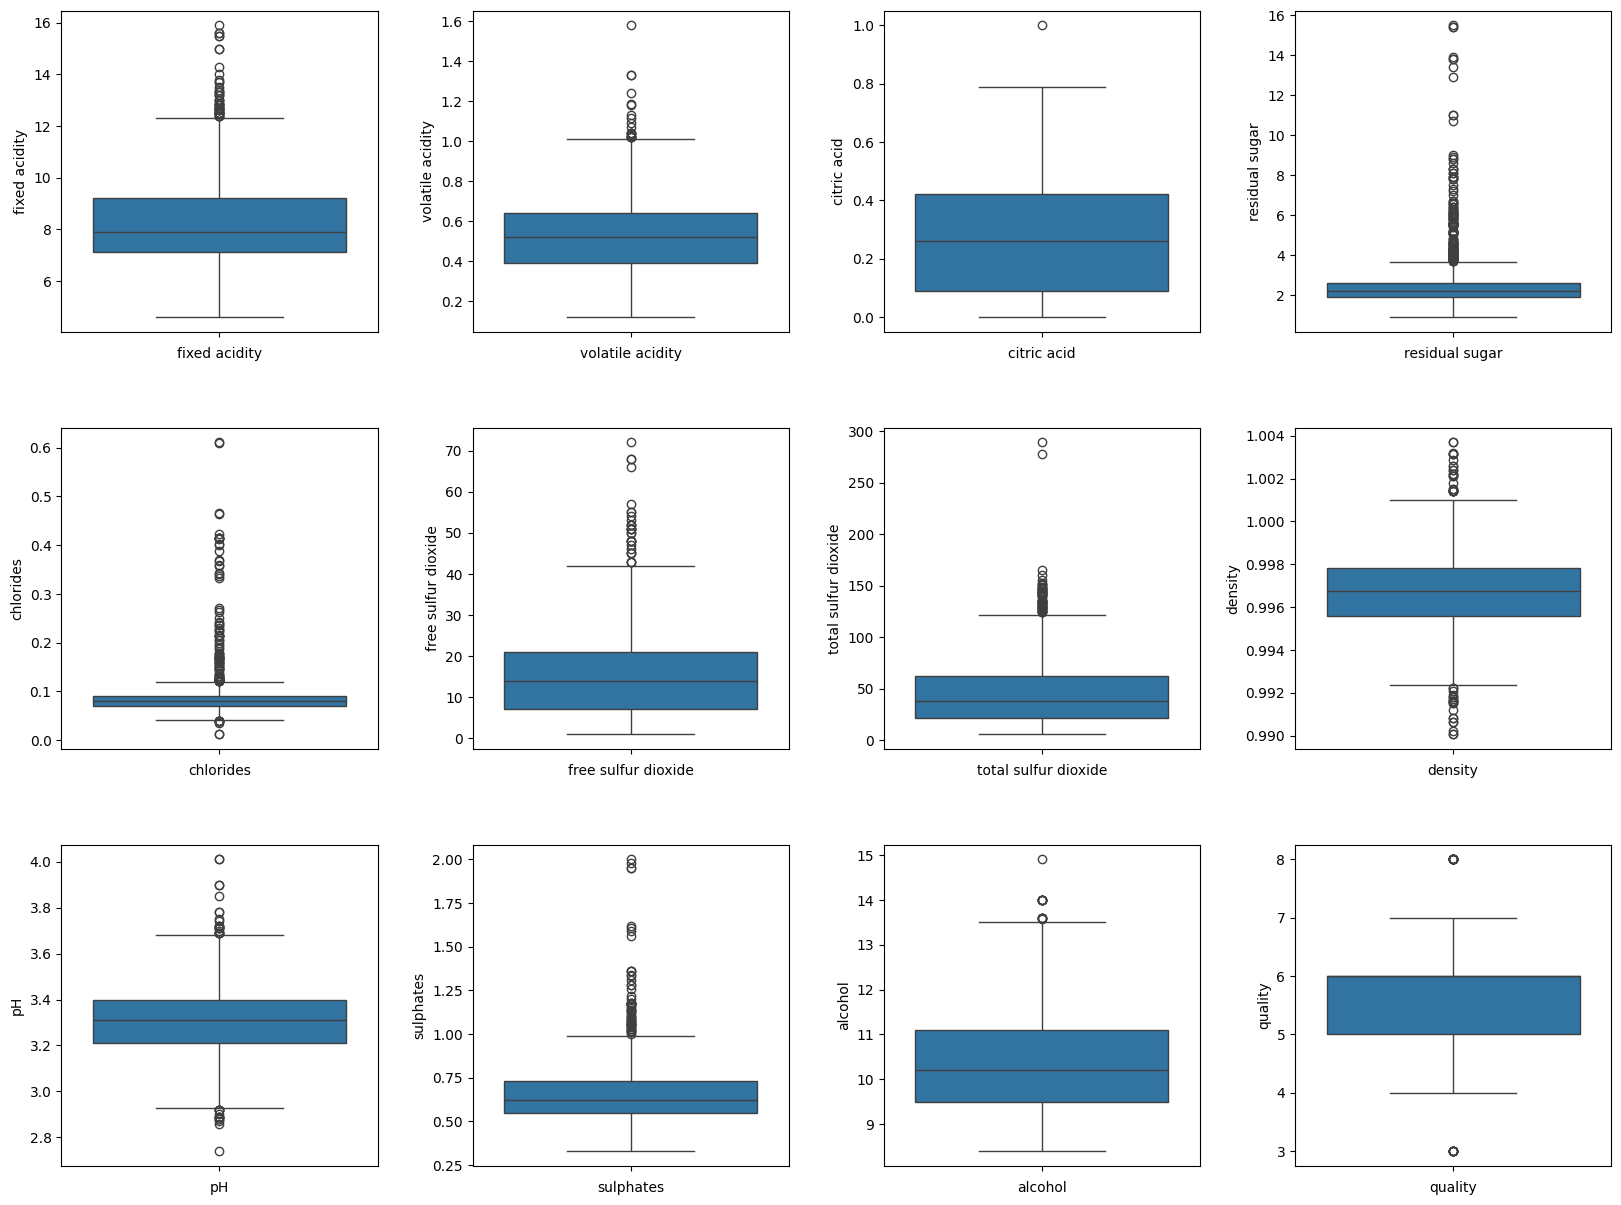

In [ ]:
plt.figure()

f, ax = plt.subplots(3, 4)
f.set_size_inches((20, 15))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
for idx, col in enumerate(data.columns):
    plt.subplot(3, 4, idx+1)
    plt.xlabel(col)
    sns.boxplot(data[col])
plt.show()

In [ ]:
def remove_out(dataframe, remove_col, rev_range):
    dff = dataframe
    for k in remove_col:
        print(k)
        level_1q = dff[k].quantile(0.25)
        level_3q = dff[k].quantile(0.75)
        IQR = level_3q - level_1q
        dff = dff[(dff[k] <= level_3q + (rev_range * IQR)) & (dff[k] >= level_1q - (rev_range * IQR))]
        dff = dff.reset_index(drop=True)
    return dff

#데이터 전처리 (이상치 제거)
r_data = remove_out(data, data.columns[:len(data.columns)-1], 1.5)
r_data

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1130,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1131,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1132,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1133,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<Figure size 640x480 with 0 Axes>

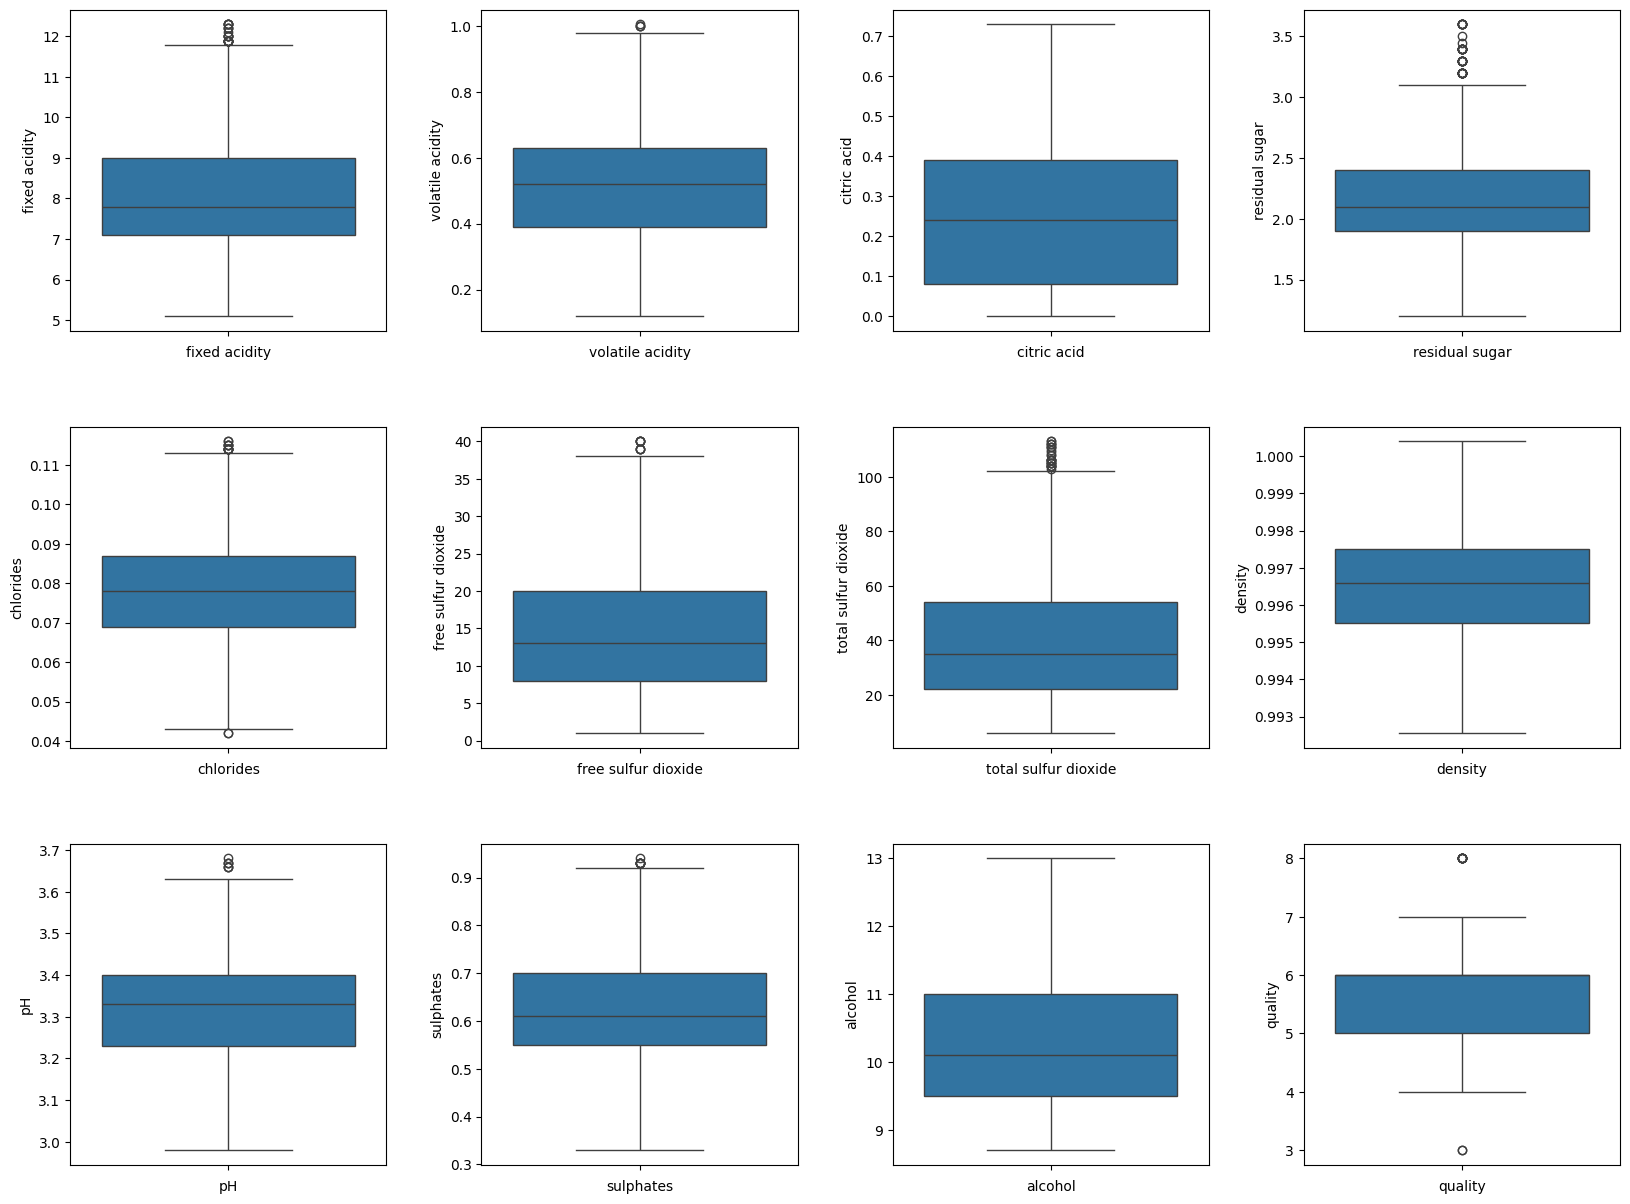

In [ ]:
plt.figure()

f, ax = plt.subplots(3, 4)
f.set_size_inches((20, 15))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
for idx, col in enumerate(r_data.columns):
    plt.subplot(3, 4, idx+1)
    plt.xlabel(col)
    sns.boxplot(r_data[col])
plt.show()

In [ ]:
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

"""데이터 전처리 (정규화)"""
p_data = pd.DataFrame(index=r_data.index, columns=r_data.columns)
for d in r_data.columns:
    temp = MinMaxScaler().fit_transform(r_data[d].values.reshape(-1,1)).round(4) #정규화 및 반올림 (평균이 0이고 분산이 1인 분포)
    p_data[d] = pd.Series(temp.flatten(), index=r_data.index)
print(p_data)


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            0.3194            0.6554       0.0000          0.2917     0.4595   
1            0.3750            0.8588       0.0000          0.5833     0.7568   
2            0.3750            0.7232       0.0548          0.4583     0.6757   
3            0.8472            0.1808       0.7671          0.2917     0.4459   
4            0.3194            0.6554       0.0000          0.2917     0.4595   
...             ...               ...          ...             ...        ...   
1130         0.1528            0.5424       0.1096          0.3333     0.6486   
1131         0.1111            0.4859       0.1370          0.4167     0.2703   
1132         0.1667            0.4407       0.1781          0.4583     0.4595   
1133         0.1111            0.5932       0.1644          0.3333     0.4459   
1134         0.1250            0.2147       0.6438          1.0000     0.3378   

      free sulfur dioxide  

<Figure size 640x480 with 0 Axes>

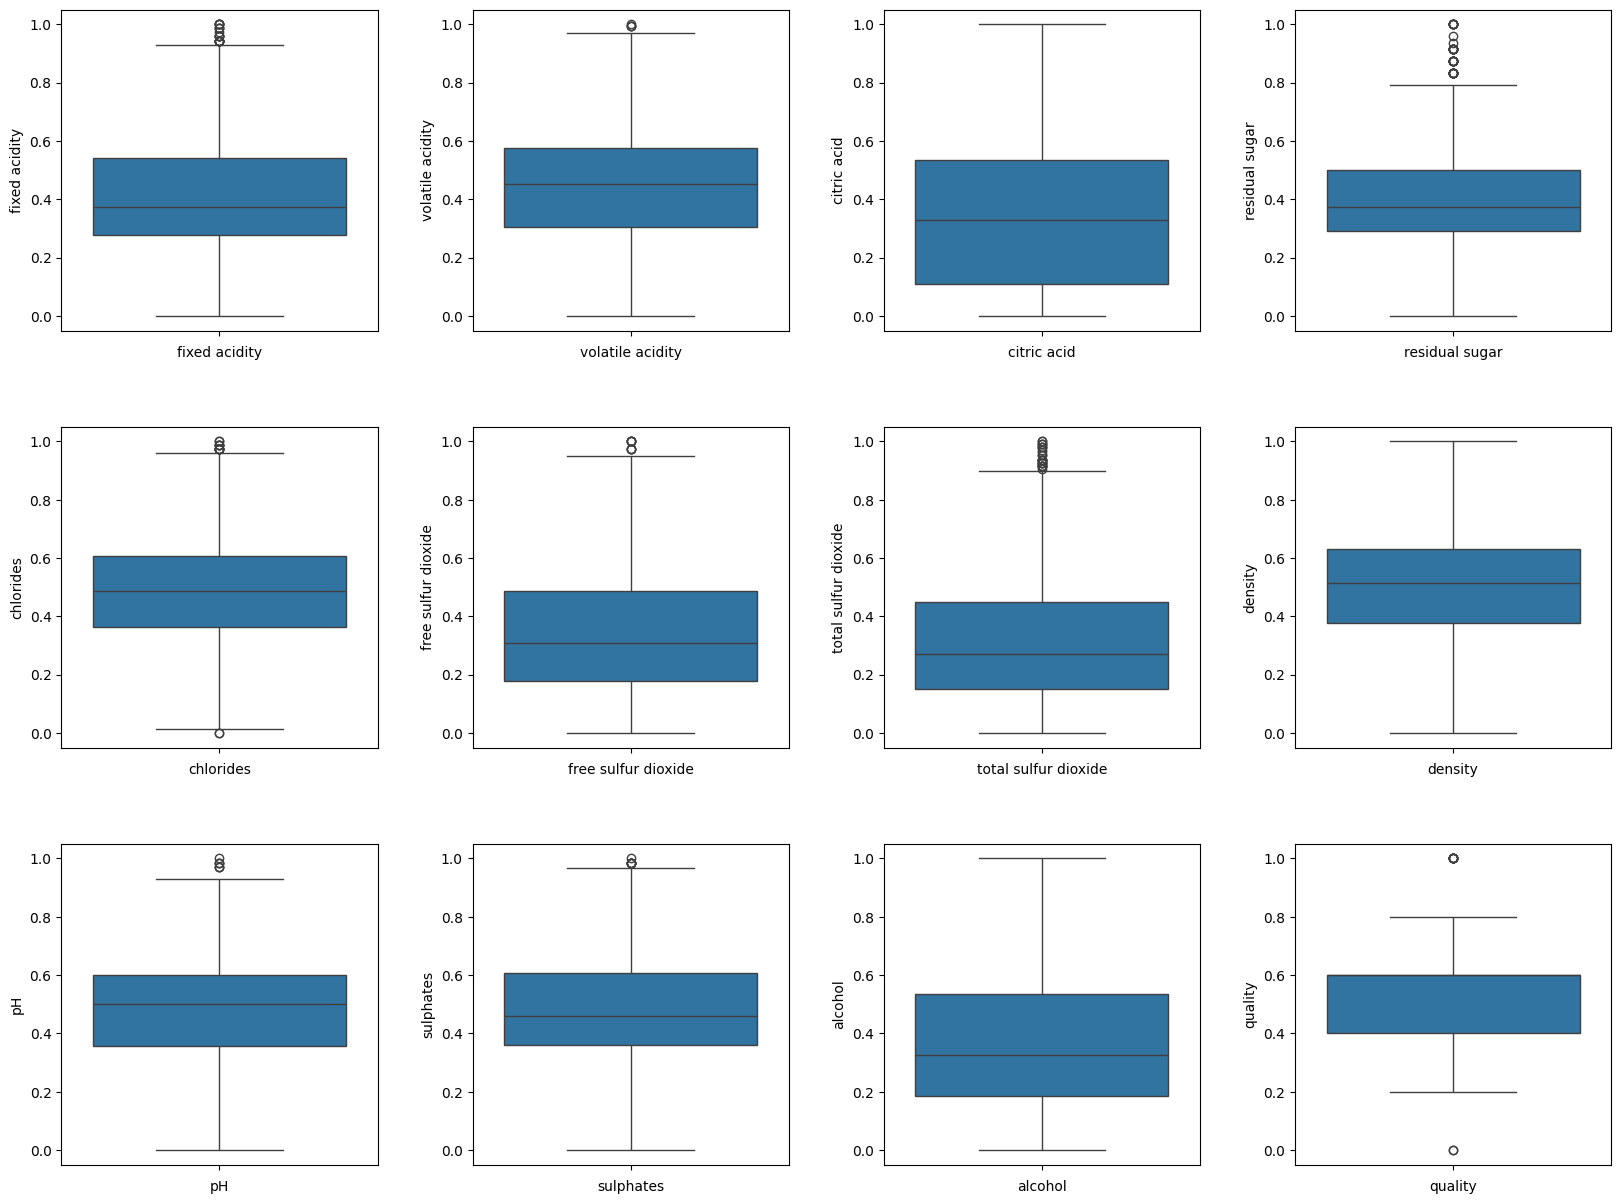

In [ ]:
plt.figure()

f, ax = plt.subplots(3, 4)
f.set_size_inches((20, 15))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
for idx, col in enumerate(p_data.columns):
    plt.subplot(3, 4, idx+1)
    plt.xlabel(col)
    sns.boxplot(p_data[col])
plt.show()

<Axes: >

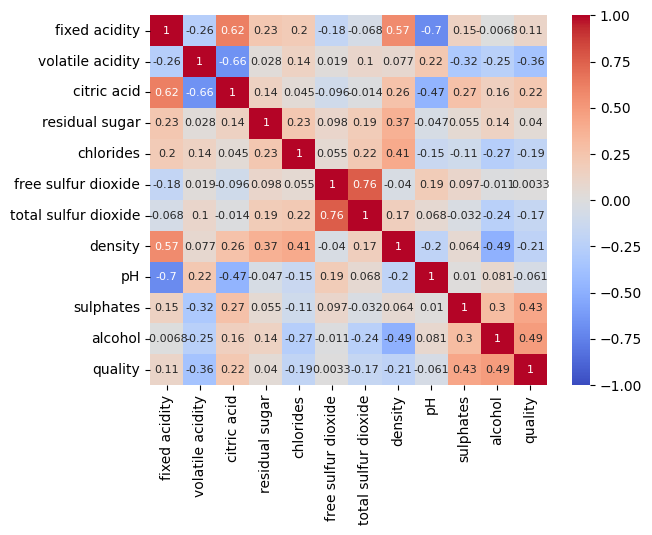

In [ ]:
import scipy.stats as stats
"""
fixed acidity: 고정 산도
volatile acidity: 휘발성 산도
citric acid: 구연산
residual sugar: 잔류 당분
chlorides: 염화물
free sulfur dioxide: 자유 이산화황
total sulfur dioxide: 총 이산화황
density: 밀도
pH: pH
sulphates: 황산염
alcohol: 알코올
quality: 품질

히트맵 분석을 통한 각 변수별 상관계수 확인
"""
sns.heatmap(p_data.corr(method='spearman'), annot=True, cmap="coolwarm", vmax=1, vmin=-1, annot_kws={"size": 8})

In [ ]:
from scipy.stats import spearmanr
# Spearman 상관계수 및 p-value 계산
results = {}
for col in p_data.columns:
    if col != 'quality':
        coef, p_value = spearmanr(p_data['quality'], p_data[col])
        results[col] = {'Spearman Coeff': coef, 'p-value': p_value}

# 결과를 데이터프레임으로 변환
results_df = pd.DataFrame(results).T.sort_values('p-value')
print(results_df)

                      Spearman Coeff       p-value
alcohol                     0.490120  1.241040e-69
sulphates                   0.432345  6.715461e-53
volatile acidity           -0.359877  4.917301e-36
citric acid                 0.220278  6.128857e-14
density                    -0.213539  3.590696e-13
chlorides                  -0.192226  6.580961e-11
total sulfur dioxide       -0.170317  7.748687e-09
fixed acidity               0.110397  1.941172e-04
pH                         -0.061322  3.886856e-02
residual sugar              0.039878  1.794222e-01
free sulfur dioxide         0.003260  9.126474e-01


In [ ]:
"""
결과
                      Spearman Coeff       p-value
alcohol                     0.490120  1.241040e-69
sulphates                   0.432345  6.715461e-53
volatile acidity           -0.359877  4.917301e-36
citric acid                 0.220278  6.128857e-14
density                    -0.213539  3.590696e-13
chlorides                  -0.192226  6.580961e-11
total sulfur dioxide       -0.170317  7.748687e-09
fixed acidity               0.110397  1.941172e-04
pH                         -0.061322  3.886856e-02
residual sugar              0.039878  1.794222e-01
free sulfur dioxide         0.003260  9.126474e-01
"""

'\n결과\n                      Spearman Coeff       p-value\nalcohol                     0.490120  1.241040e-69\nsulphates                   0.432345  6.715461e-53\nvolatile acidity           -0.359877  4.917301e-36\ncitric acid                 0.220278  6.128857e-14\ndensity                    -0.213539  3.590696e-13\nchlorides                  -0.192226  6.580961e-11\ntotal sulfur dioxide       -0.170317  7.748687e-09\nfixed acidity               0.110397  1.941172e-04\npH                         -0.061322  3.886856e-02\nresidual sugar              0.039878  1.794222e-01\nfree sulfur dioxide         0.003260  9.126474e-01\n'

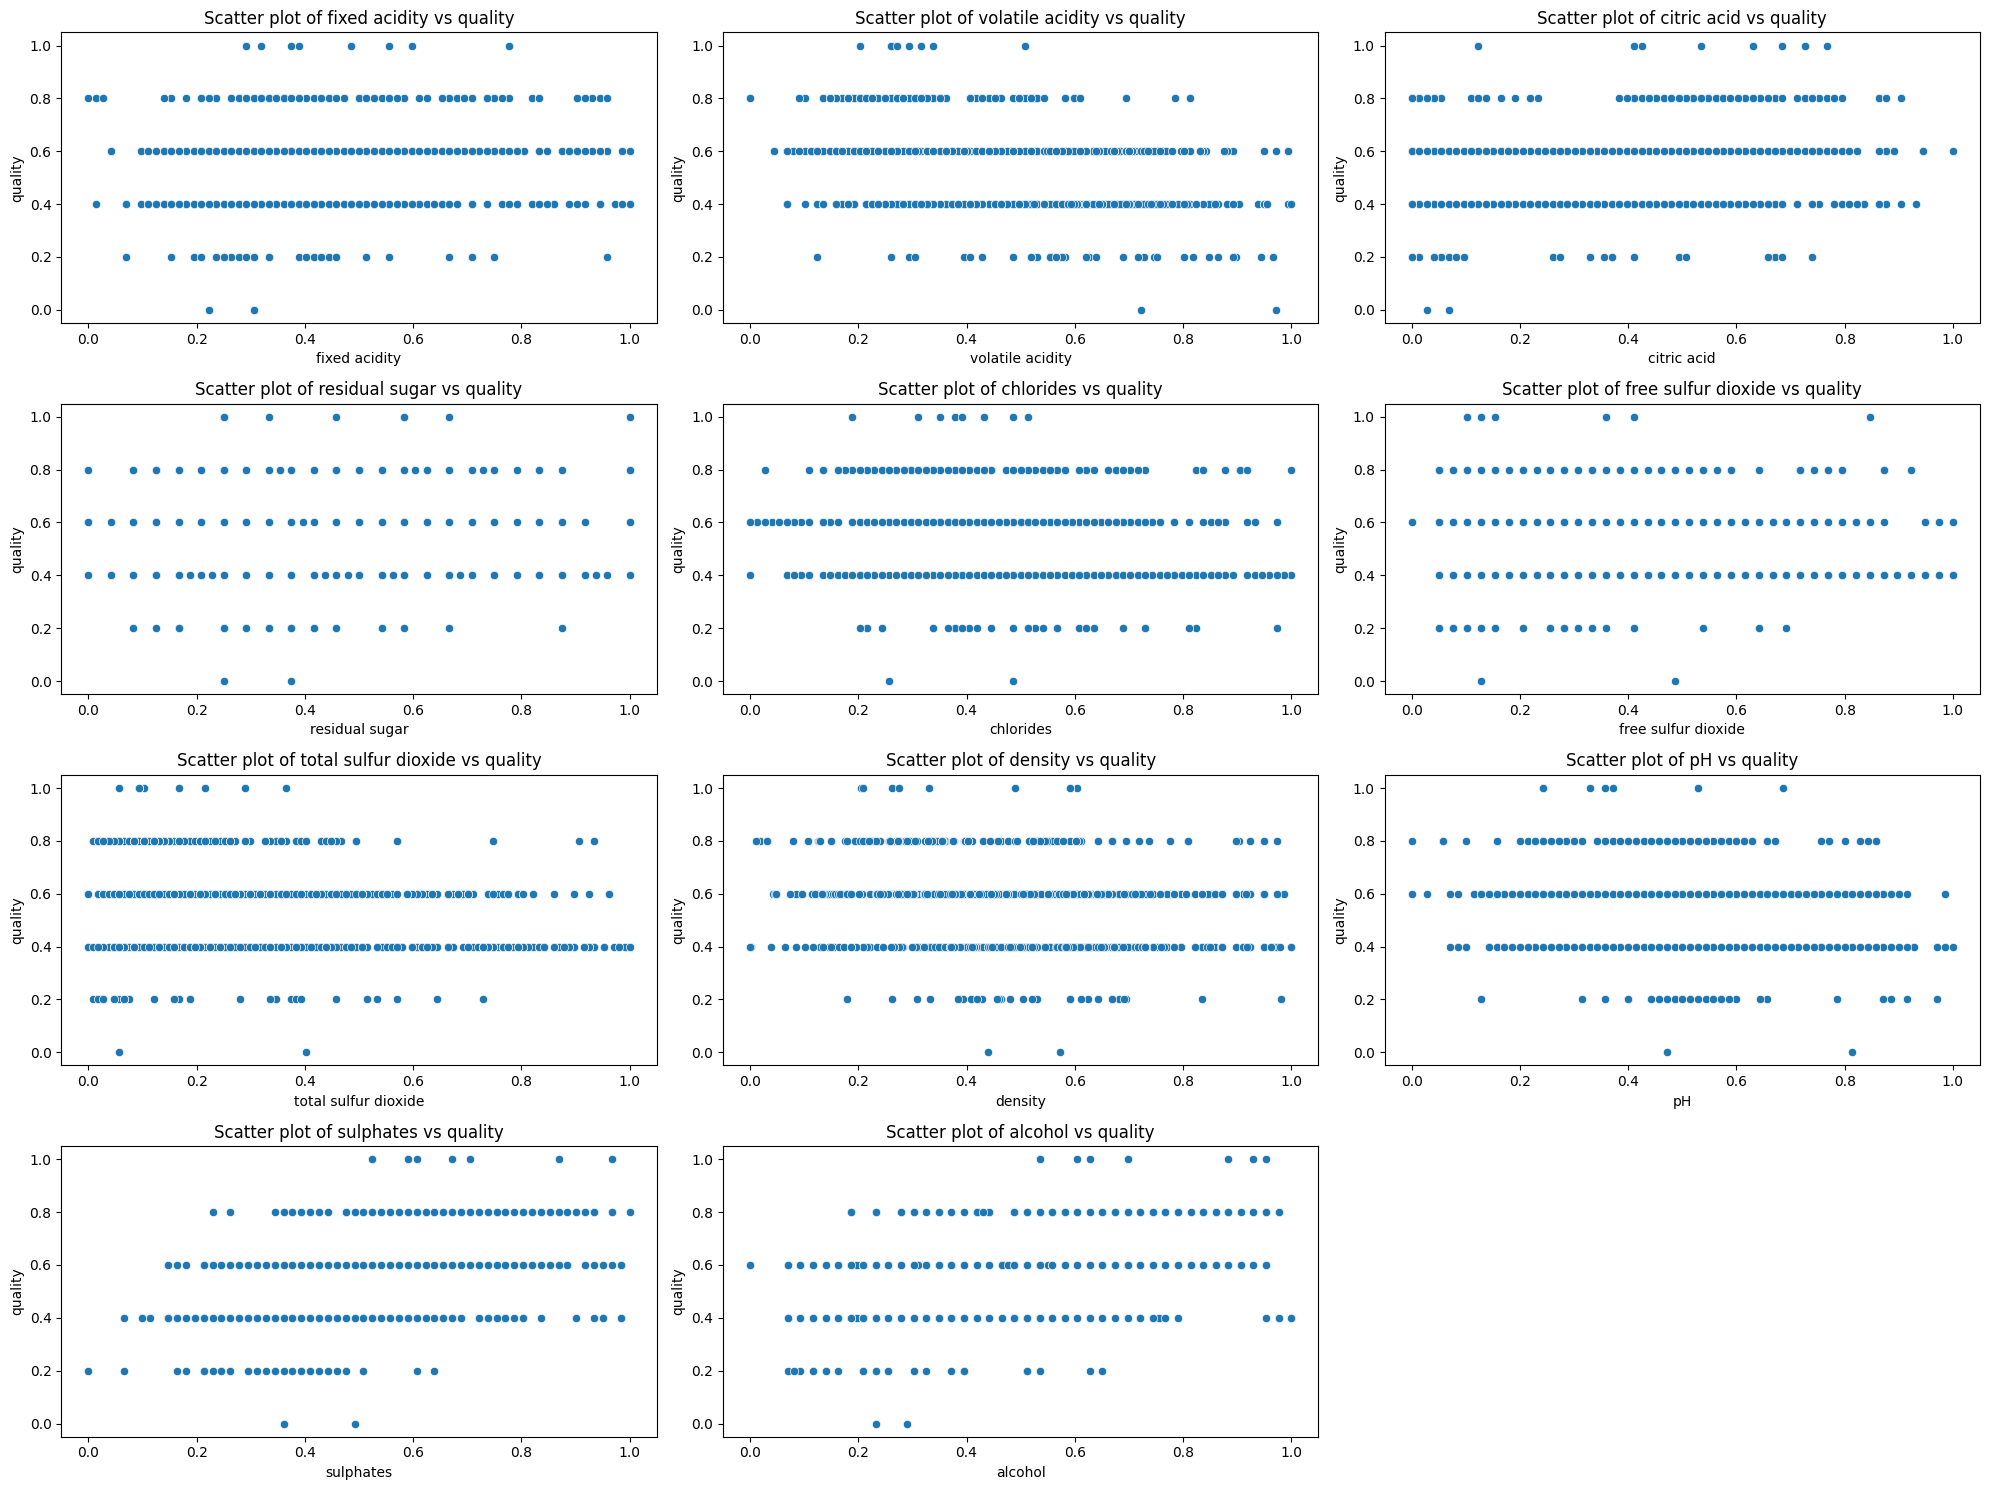

In [ ]:
# 종속 변수와 독립 변수 정의
dependent_var = 'quality'
independent_vars = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol'
]

# scatter plot 그리기
plt.figure(figsize=(20, 15))

for i, var in enumerate(independent_vars):
    plt.subplot(4, 3, i + 1)
    sns.scatterplot(x=var, y=dependent_var, data=p_data)
    plt.title(f'Scatter plot of {var} vs {dependent_var}')
    plt.xlabel(var)
    plt.ylabel(dependent_var)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# 예제 데이터 로드 (r_data를 사용하세요)
# r_data = pd.read_csv('your_data.csv')

# 독립 변수와 종속 변수 정의
X = p_data.drop('quality', axis = 1)
y = p_data['quality']

# 데이터 분할: 80% 훈련 데이터, 20% 테스트 데이터
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 훈련 및 예측
models = {
    'XGBoost': xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)
}

results = {}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'R2': r2}

# 결과 출력
for model_name, metrics in results.items():
    print(f"{model_name} - MSE: {metrics['MSE']:.2f}, R2: {metrics['R2']:.2f}")


XGBoost - MSE: 0.30, R2: 0.36


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 예제 데이터 로드 (r_data를 사용하세요)
# r_data = pd.read_csv('your_data.csv')

# 종속 변수와 독립 변수 정의
dependent_var = 'quality'
independent_vars = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol'
]

X = data[independent_vars]
y = data[dependent_var]

# 데이터 분할: 80% 훈련 데이터, 20% 테스트 데이터
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 결정 트리 모델 훈련
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train_scaled, y_train)

# 예측
y_pred = decision_tree.predict(X_test_scaled)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Decision Tree - MSE: {mse:.2f}, R2: {r2:.2f}")

Decision Tree - MSE: 0.61, R2: 0.06


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 예제 데이터 로드 (r_data를 사용하세요)
# r_data = pd.read_csv('your_data.csv')

# 종속 변수와 독립 변수 정의
dependent_var = 'quality'
independent_vars = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol'
]

X = p_data[independent_vars]
y = p_data[dependent_var]

# 데이터 분할: 80% 훈련 데이터, 20% 테스트 데이터
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 배깅을 사용한 결정 트리 모델 훈련
bagging_regressor = BaggingRegressor(
    base_estimator=DecisionTreeRegressor(random_state=42),
    n_estimators=100,
    random_state=42
)
bagging_regressor.fit(X_train_scaled, y_train)

# 예측
y_pred = bagging_regressor.predict(X_test_scaled)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Bagging Decision Tree - MSE: {mse:.2f}, R2: {r2:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Decision Tree - MSE: 0.26, R2: 0.45


In [ ]:
from sklearn.model_selection import train_test_split

x = p_data.drop('quality', axis = 1)
y = p_data['quality']

#train, test 데이터 분류
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#선형 회귀 예측
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.012074561664744032
R^2 Score: 0.3635535106151849


In [ ]:
#랜덤 포레스트
model_r = RandomForestRegressor(n_estimators=100, random_state=42)
model_r.fit(x_train, y_train)

# 모델 평가
y_pred = model_r.predict(x_test)
print(y_pred)
print(y_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

[5.3  6.33 5.09 4.99 6.75 5.48 5.13 5.29 5.13 5.94 6.04 5.28 6.62 6.88
 6.42 5.21 5.87 5.92 6.63 5.53 5.54 6.29 5.94 5.19 5.46 5.76 5.1  5.3
 6.2  5.22 5.3  5.79 5.23 5.42 5.97 5.61 5.92 5.31 5.48 5.91 6.6  5.38
 5.69 5.09 5.82 6.7  5.38 6.51 5.25 6.06 5.73 5.25 6.11 5.27 5.6  5.11
 5.2  5.21 4.97 5.59 5.82 5.46 5.62 5.64 6.15 6.22 4.96 6.52 4.89 5.69
 5.13 7.27 5.43 6.02 5.57 5.32 4.85 5.06 6.93 5.17 5.83 5.15 5.26 6.21
 6.59 5.97 6.27 5.7  5.43 5.83 6.72 6.35 6.22 6.35 5.54 5.97 6.04 5.89
 5.54 6.65 6.8  5.33 6.74 6.57 6.95 5.53 5.34 6.37 6.51 6.14 6.08 5.13
 6.02 5.28 6.26 5.57 6.9  5.12 5.04 5.45 5.51 5.21 6.74 5.52 6.7  5.96
 5.91 5.94 5.06 6.06 5.37 5.16 5.09 6.62 5.49 4.95 5.32 5.15 6.48 5.22
 5.09 5.04 5.42 5.89 5.15 6.07 5.15 5.82 5.95 5.72 5.11 5.29 5.75 5.15
 6.24 5.24 5.8  4.91 5.87 5.9  5.93 5.61 5.   6.05 5.02 5.4  5.27 5.54
 6.74 6.67 5.69 5.43 6.88 5.62 5.67 6.05 4.9  5.9  5.79 5.89 5.3  5.41
 5.47 5.53 5.68 5.47 5.67 5.16 6.74 5.59 5.21 5.43 5.26 5.42 5.23 5.13
 5.41 6

In [ ]:
p_data = pd.DataFrame(index=r_data.index, columns=r_data.columns)
for d in r_data.columns:
    if d != 'quality':
        temp = MinMaxScaler().fit_transform(r_data[d].values.reshape(-1,1)).round(4) #정규화 및 반올림 (평균이 0이고 분산이 1인 분포)
        p_data[d] = pd.Series(temp.flatten(), index=r_data.index)
    else :
        p_data[d] = r_data[d].values
print(p_data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            0.3194            0.6554       0.0000          0.2917     0.4595   
1            0.3750            0.8588       0.0000          0.5833     0.7568   
2            0.3750            0.7232       0.0548          0.4583     0.6757   
3            0.8472            0.1808       0.7671          0.2917     0.4459   
4            0.3194            0.6554       0.0000          0.2917     0.4595   
...             ...               ...          ...             ...        ...   
1130         0.1528            0.5424       0.1096          0.3333     0.6486   
1131         0.1111            0.4859       0.1370          0.4167     0.2703   
1132         0.1667            0.4407       0.1781          0.4583     0.4595   
1133         0.1111            0.5932       0.1644          0.3333     0.4459   
1134         0.1250            0.2147       0.6438          1.0000     0.3378   

      free sulfur dioxide  

Mean Squared Error: 0.2574788546255507
R^2 Score: 0.4571347013093289


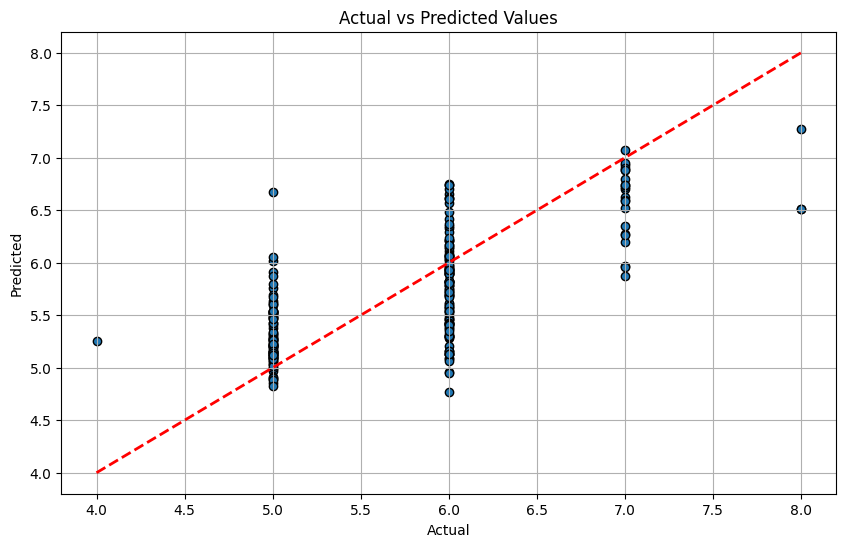

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 모델 학습 및 예측
model_r = RandomForestRegressor(n_estimators=100, random_state=42)
model_r.fit(x_train, y_train)
y_pred = model_r.predict(x_test)

# MSE와 R^2 계산
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

Mean Squared Error: 0.2574788546255507
R^2 Score: 0.4571347013093289


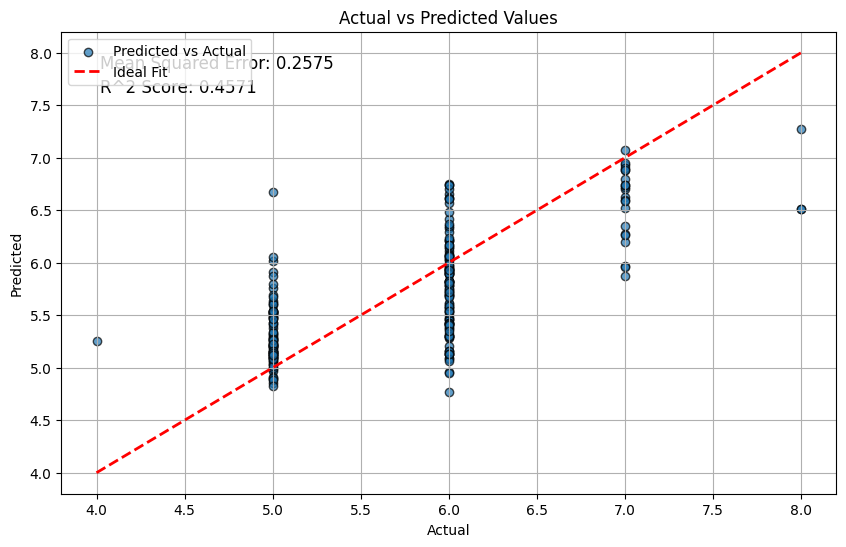

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 모델 학습 및 예측
model_r = RandomForestRegressor(n_estimators=100, random_state=42)
model_r.fit(x_train, y_train)
y_pred = model_r.predict(x_test)

# MSE와 R^2 계산
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0), alpha=0.7, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2, label="Ideal Fit")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.grid(True)

# MSE와 R^2 텍스트로 추가
plt.text(0.05, 0.95, f'Mean Squared Error: {mse:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.90, f'R^2 Score: {r2:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.legend()
plt.show()
